In [51]:
from tooling.experiment import get_model
from tooling.config import DualModelStagedBERTConfig, StagedBERT
from tooling.config import Experiment, Transformation
from copy import deepcopy
from omegaconf import OmegaConf
import mlflow
from typing import List
from pathlib import Path
from classifiers.staged_bert.model import StagedBertForTokenClassification
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
first_stage_sner = "7940402dd4cc49978a5e9e12621d8791"
second_stage_sner = "77e819a943f1476786b66ed0d5c254fb"

first_stage_bilstm = "ff24a3452e3e49e4b17148bca1f282a1"
second_stage_bilstm = "4df78548ebe943c8b1ab27e004b6a2bf"

first_stage_high_recall = "70bb99b8a5364430b2aed5ef76f224c2"
second_stage_high_recall = "fbef54c9959d4926bf7b2acd35f063b1"

first_stage_high_precision = "e4cba0ebbac3493fbfd4763dcba5b463"
second_stage_high_precision = "19609dc1b8ba418386caec2c947b6c04"

first_stage_selected = "1125d8020af24135aed1b28501d8eedb"
second_stage_selected = "1a45a7a27e614f9da5c013652e7895d7"

first_stage_selected = "1125d8020af24135aed1b28501d8eedb"
second_stage_selected = "1a45a7a27e614f9da5c013652e7895d7"

second_stage_perfect = "eaaea5fa67b84a65b1452972702d3973"

snerbilstm_than_bert = [
    (first_stage_sner, second_stage_sner),
    (first_stage_bilstm, second_stage_bilstm),
    (first_stage_high_precision, second_stage_high_precision),
    (first_stage_high_recall, second_stage_high_recall),
]

bert_than_bert = (first_stage_selected, second_stage_selected)

In [53]:
def get_f1_from_sner_and_bilstm(run_id) -> List[float]:
    client = mlflow.tracking.MlflowClient()
    metrics = client.get_metric_history(run_id, "f1")
    f1_values = [metric.value for metric in metrics]
    return f1_values

In [54]:
def get_f1_from_bert(run_id) -> List[float]:
    client = mlflow.tracking.MlflowClient()
    metrics = client.get_metric_history(run_id, "f1")
    metrics = list(filter(lambda x: x.step == 10, metrics))
    f1_values = [metric.value for metric in metrics]
    return f1_values

In [55]:
f1_tuples = []

for first_stage, second_stage in snerbilstm_than_bert:
    first = get_f1_from_sner_and_bilstm(first_stage)
    second = get_f1_from_bert(second_stage)
    f1_tuples += list(zip(first, second, strict=True))


first = get_f1_from_bert(bert_than_bert[0])
second = get_f1_from_bert(bert_than_bert[1])
f1_tuples += list(zip(first, second, strict=True))

first = [1.0, 1.0, 1.0, 1.0, 1.0]
second = get_f1_from_bert(second_stage_perfect)
f1_tuples += list(zip(first, second, strict=True))

f1_tuples

[(0.7431091873088966, 0.6038918786763122),
 (0.7385861377890173, 0.6061858378023859),
 (0.7238942480006881, 0.5864894691988192),
 (0.7286611379980444, 0.5984169284592309),
 (0.713794981071884, 0.571688254844095),
 (0.740013602420687, 0.6153373847688194),
 (0.7408464717479962, 0.6101207885807134),
 (0.7083611559277192, 0.5974419807620287),
 (0.7188967099961745, 0.610414328876009),
 (0.6998384721877147, 0.5876783872590241),
 (0.698956203118644, 0.6169425626064282),
 (0.6265068095828821, 0.6099112238107387),
 (0.6741317739583397, 0.5992257424412158),
 (0.6859565551817808, 0.6165408197782946),
 (0.6593053748056971, 0.5848111299725953),
 (0.6903025690729304, 0.6098277526328101),
 (0.6971947148703322, 0.6038248349524216),
 (0.6917517978418077, 0.5740843302726854),
 (0.6802558357694081, 0.6075162115787995),
 (0.6785119565759374, 0.5803529670469332),
 (0.7871001863586051, 0.6523973637443051),
 (0.7954254511093519, 0.6597215552892262),
 (0.7845305340468934, 0.646086253945405),
 (0.7731598533082

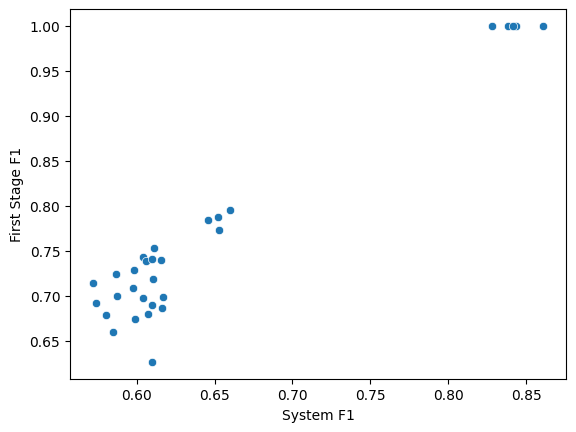

In [57]:
f1s = pd.DataFrame(f1_tuples, columns=["First Stage F1", "System F1"])

fg = sns.scatterplot(f1s, y="First Stage F1", x="System F1")

In [58]:
f1s.corr()

,First Stage F1,System F1
First Stage F1,1.000000,0.967252
System F1,0.967252,1.000000


In [ ]:
from pathlib import Path

savepath = Path("~/Documents/MA/ma_latex/images/40_design/").expanduser()

fg.figure.savefig(
    savepath.joinpath("correlation.png"),
    bbox_inches="tight",
)